In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_1300 = pd.read_csv('/content/drive/MyDrive/UNIVERSITAS TELKOM S2/SEMESTER 3/DAMIN/UAS - Project 2/medical1300.csv')
df_900 = pd.read_csv('/content/drive/MyDrive/UNIVERSITAS TELKOM S2/SEMESTER 3/DAMIN/UAS - Project 2/medical900.csv')
df_900.shape,df_1300.shape

((986, 11), (1338, 7))

In [4]:
medical900 = df_900.copy()
medical1300 = df_1300.copy()

# Exploratory Data Analysis (EDA) on Medical Datasets

## General Information and Summary Statistics

### Dataset 1 (medical900.csv):
- Number of Entries: 986
- Features: 11 (Age, Diabetes, BloodPressureProblems, AnyTransplants, - AnyChronicDiseases, Height, Weight, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries, PremiumPrice)
- Data Types: All features are integers.
- Missing Values: None

### Dataset 2 (medical1300.csv):
- Number of Entries: 1338
- Features: 7 (age, sex, bmi, children, smoker, region, charges)
- Data Types: Integers, floats, and objects (categorical data).
- Missing Values: None

## Summary Statistics
### Dataset 1 (medical900.csv):
- Age: Mean = 41.75, Std = 13.96
- Height: Mean = 166.99, Std = 9.97
- Weight: Mean = 75.39, Std = 15.29
- PremiumPrice: Mean = 27237.94, Std = 2316.67

### Dataset 2 (medical1300.csv):
- Age: Mean = 39.21, Std = 14.05
- BMI: Mean = 30.66, Std = 6.09
- Charges: Mean = 13270.42, Std = 12110.01

## Correlation Analysis
### Dataset 1 (medical900.csv):
- Age is positively correlated with NumberOfMajorSurgeries (0.43) and PremiumPrice (0.70).
- NumberOfMajorSurgeries is also positively correlated with PremiumPrice (0.26).

### Dataset 2 (medical1300.csv):
- Age shows a moderate positive correlation with charges (0.30).
- BMI and charges have a positive correlation (0.20).

## Insights and Analysis
- Age and PremiumPrice: In the first dataset, there is a significant correlation between age and the premium price. Older individuals tend to have higher premiums, likely due to increased health risks with age.
- Number of Major Surgeries: This feature is positively correlated with age and premium price, indicating that individuals who have undergone more surgeries tend to be older and have higher insurance premiums.
- Height and Weight: In the first dataset, weight and height do not show a significant correlation with premium prices directly, suggesting that other factors might play a more substantial role in determining premiums.
- Health Conditions: There is a positive correlation between chronic diseases and premium prices, indicating that individuals with chronic conditions are charged higher premiums.
- Insurance Charges: In the second dataset, age and BMI have a noticeable impact on insurance charges, which is expected as these factors are significant indicators of health risks.
- Smoker Status: Although not directly analyzed through correlations here, smoker status typically has a strong impact on insurance charges and could be further explored.

In [30]:
# General information about the datasets
info_900 = medical900.info()
print("\n")
info_1300 = medical1300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -

In [36]:
# Summary statistics
summary_900 = medical900.describe()
summary_1300 = medical1300.describe()
summary_900

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [37]:
summary_1300

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
# Checking for missing values
missing_values_900 = medical900.isnull().sum()
missing_values_1300 = medical1300.isnull().sum()
missing_values_900

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [35]:
missing_values_1300

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [32]:
# Encode categorical variables in medical1300
medical1300_encoded = medical1300.copy()

# Use LabelEncoder for categorical variables
for column in medical1300_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    medical1300_encoded[column] = le.fit_transform(medical1300_encoded[column])

# Calculate the correlation matrices
print("\nCorrealation Matrix")
correlation_900 = medical900.corr()
correlation_1300_encoded = medical1300_encoded.corr()
correlation_900


Correalation Matrix


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


In [33]:
correlation_1300_encoded

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# Analysis of Relationships Between Features and Charges/Premium Prices


## Dataset 1: medical900.csv
- Age vs. PremiumPrice: There's a clear trend showing that as age increases, the premium price tends to increase as well. This is expected due to higher health risks associated with older age.
- Diabetes vs. PremiumPrice: While there are some higher premium prices for individuals with diabetes, the overall trend does not show a strong correlation.
- BloodPressureProblems vs. PremiumPrice: Similar to diabetes, there isn't a strong correlation visible from the scatter plot.
- AnyTransplants vs. PremiumPrice: There are a few cases with high premium prices, but the trend is not strong due to the small number of individuals with transplants.
- AnyChronicDiseases vs. PremiumPrice: Some increase in premium prices for individuals with chronic diseases is visible.
- Height vs. PremiumPrice: No significant trend is visible between height and premium price.
- Weight vs. PremiumPrice: Slight positive correlation can be observed, higher weights tend to have higher premiums.
- KnownAllergies vs. PremiumPrice: Not much of a trend visible.
- HistoryOfCancerInFamily vs. PremiumPrice: Slight increase in premium prices for individuals with a family history of cancer.
- NumberOfMajorSurgeries vs. PremiumPrice: More surgeries tend to correlate with higher premium prices.

## Dataset 2: medical1300.csv
- age vs. charges: Similar to the first dataset, there's a trend showing that older age tends to have higher charges.
- sex vs. charges: Charges vary significantly between sexes, with males and females showing different distributions.
- bmi vs. charges: There is a slight positive correlation; higher BMI tends to have higher charges.
- children vs. charges: No significant trend visible between the number of children and charges.
- smoker vs. charges: A very clear trend, with smokers having significantly higher charges than non-smokers.
- region vs. charges: There are regional differences in charges, indicating that location might play a role in the cost.

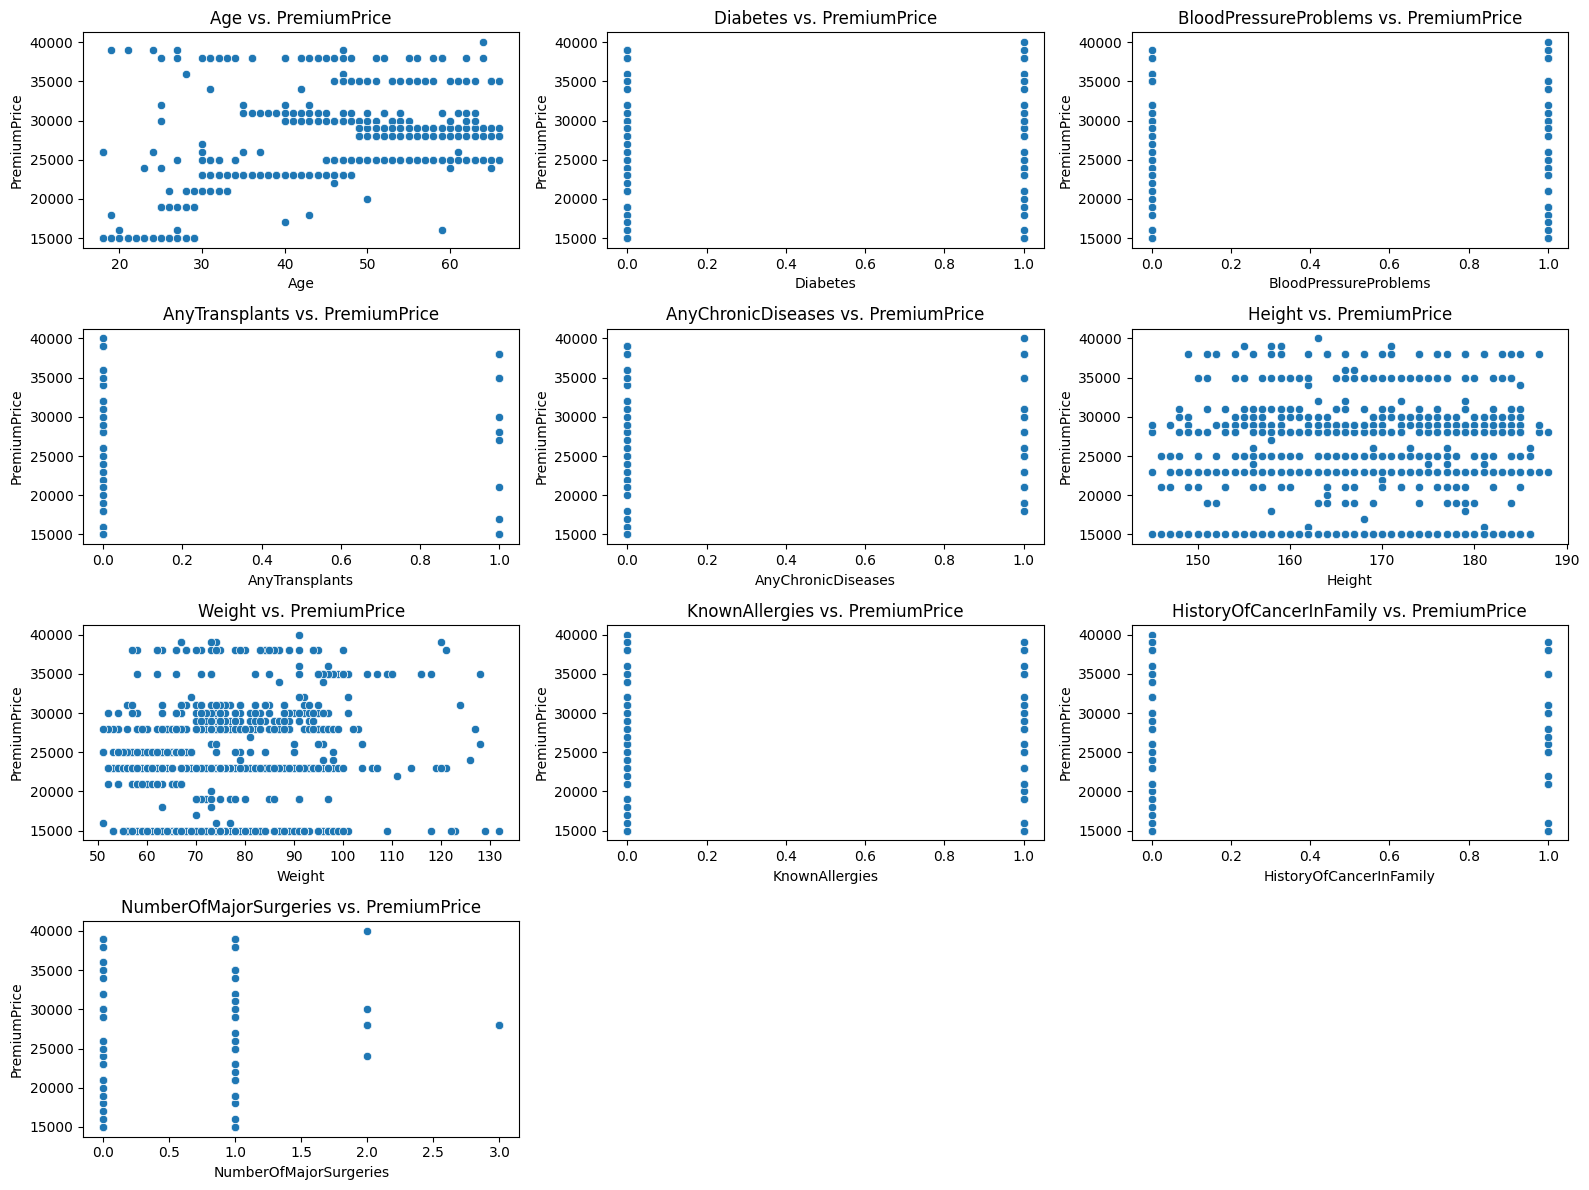

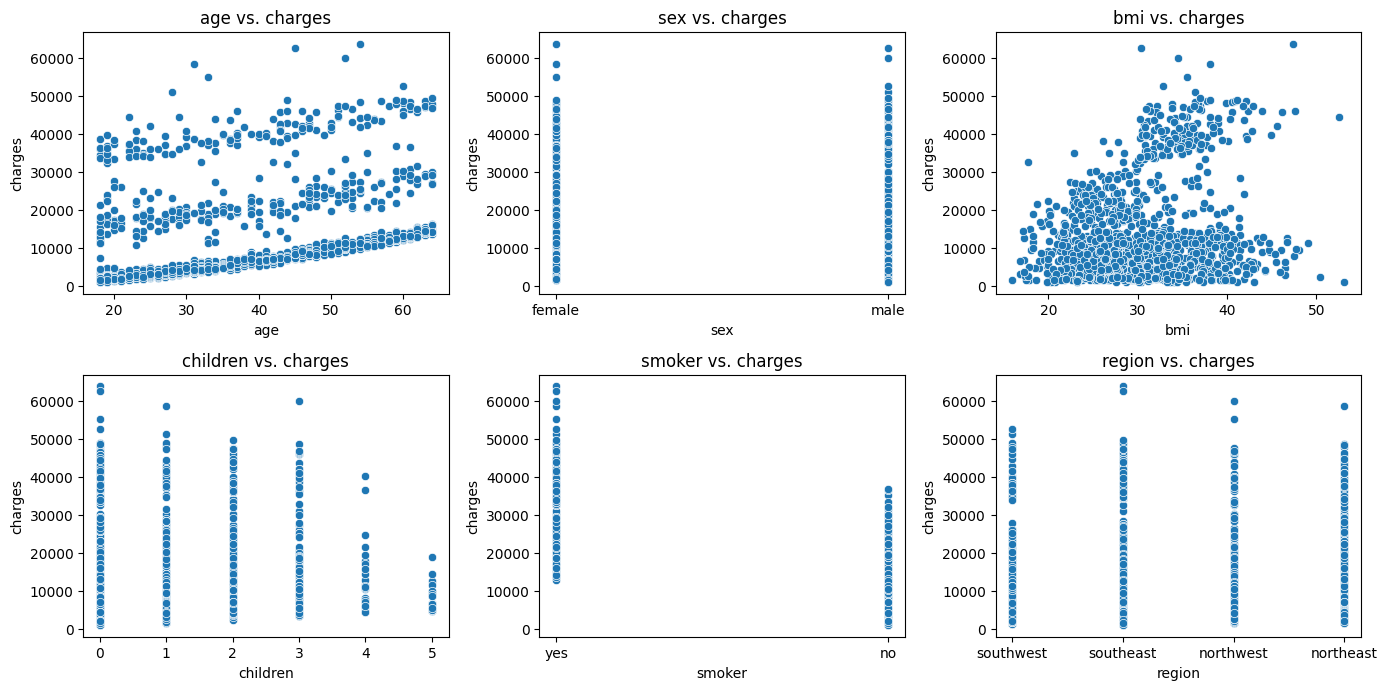

In [6]:
# Dataset 1: medical900.csv
plt.figure(figsize=(16, 12))

for i, column in enumerate(medical900.columns[:-1]):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(x=column, y='PremiumPrice', data=medical900)
    plt.title(f'{column} vs. PremiumPrice')
    plt.xlabel(column)
    plt.ylabel('PremiumPrice')

plt.tight_layout()
plt.show()

# Dataset 2: medical1300.csv
plt.figure(figsize=(14, 10))

for i, column in enumerate(medical1300.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=column, y='charges', data=medical1300)
    plt.title(f'{column} vs. charges')
    plt.xlabel(column)
    plt.ylabel('charges')

plt.tight_layout()
plt.show()

# Correlation Heatmap Visualization & Analysis

## Correlation Heatmap medical1300 Dataset

1. Age and Charges:
- Correlation Coefficient: 0.30
- Insight: Age has a moderate positive correlation with charges. Older individuals tend to incur higher medical costs.

2. BMI and Charges:
- Correlation Coefficient: 0.20
- Insight: Higher BMI is associated with higher medical charges, likely due to obesity-related health issues.

3. Smoker_yes and Charges:
- Correlation Coefficient: 0.79
- Insight: There is a very strong positive correlation between being a smoker and higher medical charges, indicating that smokers tend to have significantly higher medical costs compared to non-smokers.

4. Children and Charges:
- Correlation Coefficient: 0.07
- Insight: There is a weak correlation between the number of children and medical charges, suggesting that family size has a minor impact on individual medical costs.

5. Sex_male and Charges:
- Correlation Coefficient: -0.07
- Insight: The weak negative correlation suggests that males and females have slight differences in medical charges, with males tending to have slightly lower charges on average.

6. Region Variables (One-Hot Encoded):
- Correlation Coefficients: Vary from -0.01 to 0.01
- Insight: The regions show very weak correlations with charges, indicating minimal impact of location on medical costs in this dataset.

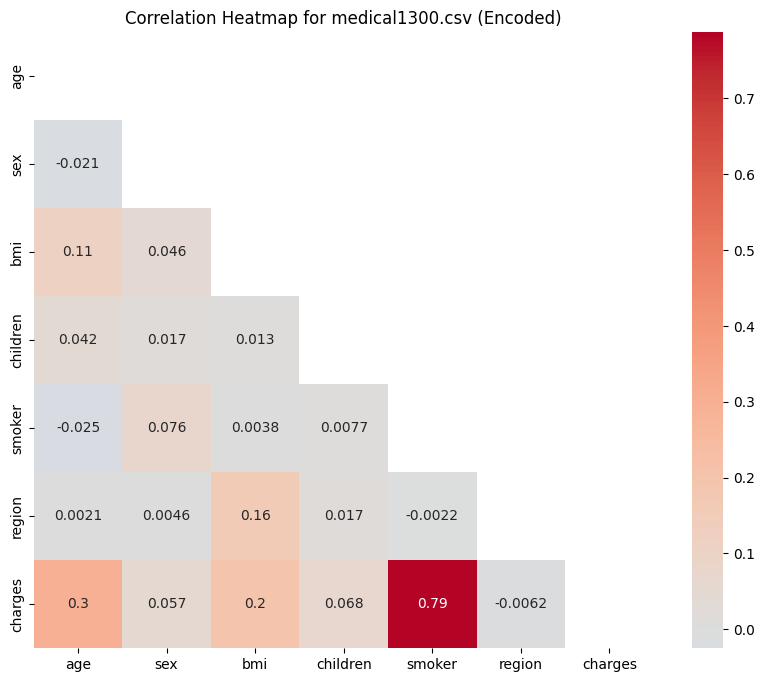

In [10]:
# Copy the original dataset to preserve it
medical1300_encoded = medical1300.copy()

# Encode categorical features
label_encoders = {}
for column in medical1300_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    medical1300_encoded[column] = le.fit_transform(medical1300_encoded[column])
    label_encoders[column] = le

# Calculate the correlation matrix
correlation_1300_encoded = medical1300_encoded.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_1300_encoded, dtype=bool))

# Plot the heatmap with a mask for the upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_1300_encoded, annot=True, mask=mask, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for medical1300.csv (Encoded)')
plt.show()

## Correlation Heatmap medical900 Dataset

1. Age and PremiumPrice:
- Correlation Coefficient: 0.70
- Insight: Age has a strong positive correlation with premium prices, indicating that older individuals tend to be charged higher premiums.

2. NumberOfMajorSurgeries and PremiumPrice:
- Correlation Coefficient: 0.26
- Insight: There is a moderate positive correlation between the number of major surgeries and premium prices, suggesting that individuals with more surgeries tend to have higher premiums.

3. Age and NumberOfMajorSurgeries:
Correlation Coefficient: 0.43
Insight: Older individuals tend to have had more major surgeries, contributing to higher premium prices.

4. AnyTransplants and PremiumPrice:
- Correlation Coefficient: 0.29
- Insight: There is a moderate correlation indicating that individuals who have had transplants tend to face higher premiums.

5. AnyChronicDiseases and PremiumPrice:
- Correlation Coefficient: 0.21
- Insight: Individuals with chronic diseases tend to have slightly higher premium prices, reflecting the additional health risks.

6. Weight and PremiumPrice:
- Correlation Coefficient: 0.14
- Insight: There is a slight positive correlation between weight and premium prices, indicating that higher weights might contribute to higher premiums.

7. BloodPressureProblems and PremiumPrice:
- Correlation Coefficient: 0.17
- Insight: Individuals with blood pressure problems tend to have higher premium prices, though the correlation is not very strong.

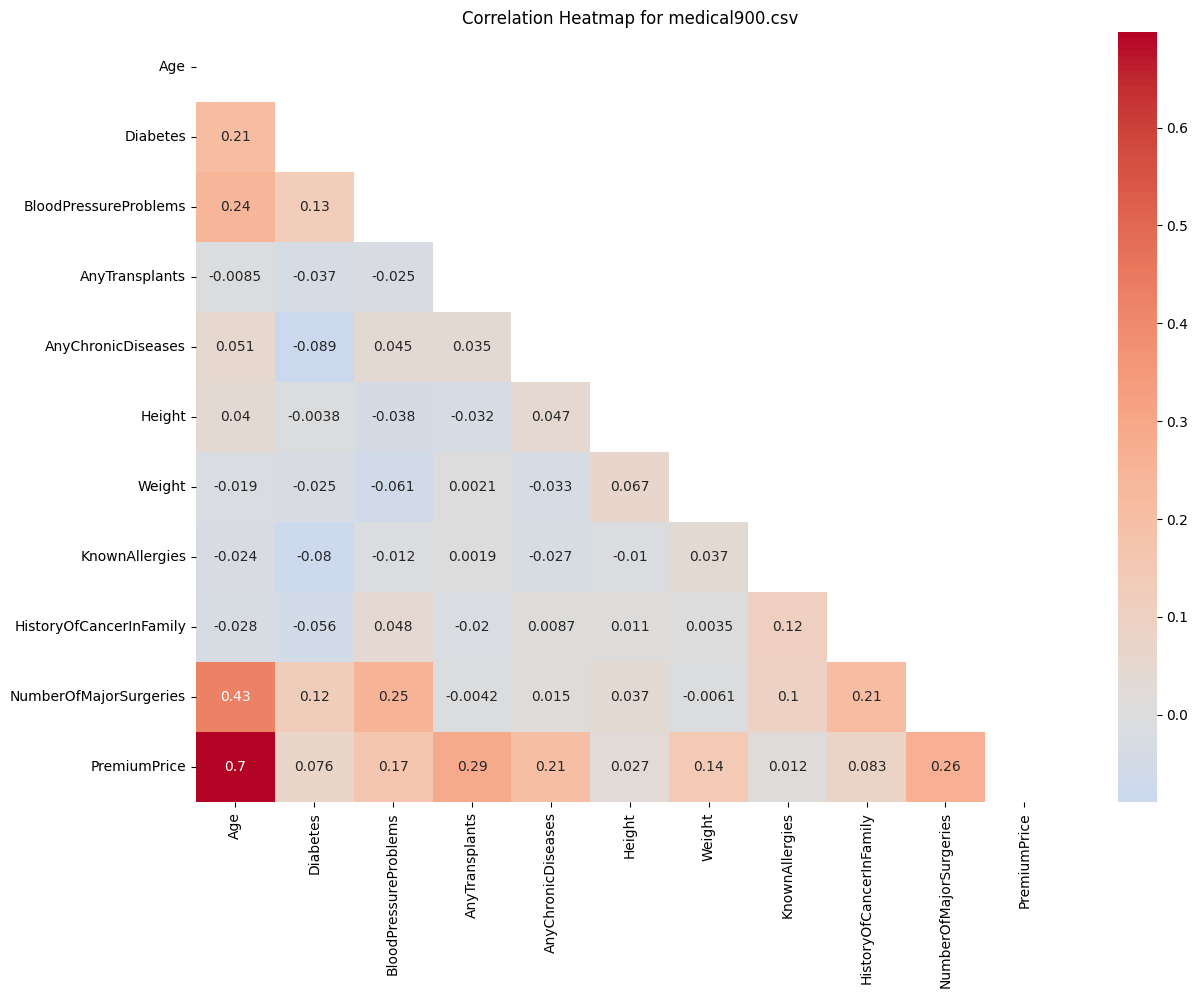

In [12]:
# Since medical900 does not contain categorical variables, we can directly create a correlation heatmap

# Calculate the correlation matrix for medical900
correlation_900 = medical900.corr()

# Create a mask for the upper triangle
mask_900 = np.triu(np.ones_like(correlation_900, dtype=bool))

# Plot the heatmap with a mask for the upper triangle
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_900, annot=True, mask=mask_900, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for medical900.csv')
plt.show()


## Overall Conclusion
- Age and Health Costs: Both datasets show a consistent trend where older individuals have higher premiums and medical charges, highlighting age as a significant factor in health-related expenses.
- Health Conditions and Costs: The presence of chronic diseases, major surgeries, and transplants are associated with higher premiums and charges, emphasizing the financial impact of severe health conditions.
- Lifestyle Factors: Smoking status is a major determinant of medical costs, with smokers incurring much higher charges.
- BMI Impact: Higher BMI correlates with increased medical charges, reflecting the cost implications of obesity-related health issues.
- Categorical Data Insights: After encoding, categorical variables such as sex and region show weaker correlations, but lifestyle-related categories (e.g., smoker status) provide strong predictive value for medical costs.


---

* Dataset medical900.csv : Premium prices are primarily influenced by age, the number of major surgeries, chronic diseases, and transplants. Height and weight alone do not significantly impact premiums.
* Dataset medical1300.csv: Medical charges are heavily influenced by age, BMI, and smoking status, with minor impacts from the number of children, sex, and region.